<a href="https://colab.research.google.com/github/marianoogimenez/google-asl-project/blob/master/Paywall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from google.cloud import bigquery
from google.colab import auth

In [0]:
auth.authenticate_user()

In [5]:
client = bigquery.Client(project='qwiklabs-gcp-4a684069c4776675')
sql="""
SELECT pase_id,dias_navegacion_x,n_visitas_x,n_disp_x,v_pw_x,q_notas_x,q_homes_x,pv_deportes_x,
       pv_espectaculos_x,pv_estilo_x,pv_noticias_x,pv_servicios_x,pv_sudoku_x,pv_sociedad_x,
       v_deportes_x,v_espectaculos_x,v_estilo_x,v_noticias_x,v_servicios_x,v_sudoku_x,
       v_sociedad_x,pvd_n,a_edad,susc_target,antiguedad_pase,q_visitas_10,q_visitas,
       genero_n,CLUSTER_ID,Unnamed,dias_navegacion_y,n_visitas_y,pvd,n_disp_y,v_pw_y,q_notas_y,
       q_homes_y,pv_deportes_y,pv_espectaculos_y,pv_estilo_y,pv_noticias_y,pv_servicios_y,pv_sudoku_y,
       pv_sociedad_y,v_deportes_y,v_espectaculos_y,v_estilo_y,v_noticias_y,v_servicios_y,v_sudoku_y,v_sociedad_y
FROM `qwiklabs-gcp-4a684069c4776675.AGEA_ASL.Paywall` 
"""

df = client.query(sql).to_dataframe()
df.head()

,pase_id,dias_navegacion_x,n_visitas_x,n_disp_x,v_pw_x,q_notas_x,q_homes_x,pv_deportes_x,pv_espectaculos_x,pv_estilo_x,...,pv_servicios_y,pv_sudoku_y,pv_sociedad_y,v_deportes_y,v_espectaculos_y,v_estilo_y,v_noticias_y,v_servicios_y,v_sudoku_y,v_sociedad_y
0,3628102,2,1,1,0,0,0,0,0,0,...,2.064900e-35,3.303841e-34,0.0,0.000000,0.0,2.643072e-33,0.000000,-4.129801e-35,6.607681e-34,0.0
1,6489400,10,1,1,0,0,12,0,0,0,...,2.064900e-35,3.303841e-34,0.0,0.000000,0.0,2.643072e-33,-0.072703,-4.129801e-35,6.607681e-34,0.0
2,1455866,5,1,1,0,0,0,0,0,0,...,2.064900e-35,-6.251681e-02,0.0,0.000000,0.0,2.643072e-33,0.000000,-4.129801e-35,-3.754676e-01,0.0
3,4575019,10,1,1,0,0,30,7,0,0,...,2.064900e-35,3.303841e-34,0.0,-0.071660,0.0,-3.775897e-01,-0.218108,-4.129801e-35,6.607681e-34,0.0
4,3909939,6,1,1,0,0,0,0,0,0,...,2.064900e-35,4.376177e-01,0.0,-0.143319,0.0,2.643072e-33,0.000000,-4.129801e-35,0.000000e+00,0.0


In [6]:
df.columns

Index(['pase_id', 'dias_navegacion_x', 'n_visitas_x', 'n_disp_x', 'v_pw_x',
       'q_notas_x', 'q_homes_x', 'pv_deportes_x', 'pv_espectaculos_x',
       'pv_estilo_x', 'pv_noticias_x', 'pv_servicios_x', 'pv_sudoku_x',
       'pv_sociedad_x', 'v_deportes_x', 'v_espectaculos_x', 'v_estilo_x',
       'v_noticias_x', 'v_servicios_x', 'v_sudoku_x', 'v_sociedad_x', 'pvd_n',
       'a_edad', 'susc_target', 'antiguedad_pase', 'q_visitas_10', 'q_visitas',
       'genero_n', 'CLUSTER_ID', 'Unnamed', 'dias_navegacion_y', 'n_visitas_y',
       'pvd', 'n_disp_y', 'v_pw_y', 'q_notas_y', 'q_homes_y', 'pv_deportes_y',
       'pv_espectaculos_y', 'pv_estilo_y', 'pv_noticias_y', 'pv_servicios_y',
       'pv_sudoku_y', 'pv_sociedad_y', 'v_deportes_y', 'v_espectaculos_y',
       'v_estilo_y', 'v_noticias_y', 'v_servicios_y', 'v_sudoku_y',
       'v_sociedad_y'],
      dtype='object')

In [0]:
df = df.drop(['pase_id','pvd_n','n_visitas_x','n_visitas_y','Unnamed'], 1)

In [21]:
df.columns

Index(['dias_navegacion_x', 'n_disp_x', 'v_pw_x', 'q_notas_x', 'q_homes_x',
       'pv_deportes_x', 'pv_espectaculos_x', 'pv_estilo_x', 'pv_noticias_x',
       'pv_servicios_x', 'pv_sudoku_x', 'pv_sociedad_x', 'v_deportes_x',
       'v_espectaculos_x', 'v_estilo_x', 'v_noticias_x', 'v_servicios_x',
       'v_sudoku_x', 'v_sociedad_x', 'a_edad', 'susc_target',
       'antiguedad_pase', 'q_visitas_10', 'q_visitas', 'genero_n',
       'CLUSTER_ID', 'dias_navegacion_y', 'pvd', 'n_disp_y', 'v_pw_y',
       'q_notas_y', 'q_homes_y', 'pv_deportes_y', 'pv_espectaculos_y',
       'pv_estilo_y', 'pv_noticias_y', 'pv_servicios_y', 'pv_sudoku_y',
       'pv_sociedad_y', 'v_deportes_y', 'v_espectaculos_y', 'v_estilo_y',
       'v_noticias_y', 'v_servicios_y', 'v_sudoku_y', 'v_sociedad_y'],
      dtype='object')

In [0]:
features = list(df.columns)
label = 'susc_target'
features.remove(label)

**DATASET**

In [0]:
traindf, evaldf = train_test_split(df, test_size=0.4,random_state=123)
columns = traindf.columns

evaldf, testdf = train_test_split(traindf, test_size=0.5,random_state=123)

In [0]:
def escalar(x,escalador,nom_clase):
    temp = x.copy()
    temp = temp.reset_index(drop=True)
    clase = temp[nom_clase]
    columnas = temp.columns
    temp = pd.DataFrame(escalador.transform(temp))
    temp.columns = columnas
    temp = temp.drop(nom_clase,1)
    temp = pd.concat([temp,clase],1)
    return temp    

In [29]:
escalador = StandardScaler()
escalador.fit(traindf)
traindf = escalar(traindf,escalador,'susc_target')
evaldf = escalar(evaldf,escalador,'susc_target')
testdf = escalar(testdf,escalador,'susc_target')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


**NET**

In [0]:
def make_feature_cols():
    input_columns = [tf.feature_column.numeric_column(k) for k in features]
    return input_columns

In [31]:
OUTDIR = './prueba'
shutil.rmtree(OUTDIR, ignore_errors = True) # start fresh each time

#optimizador =tf.train.ProximalAdagradOptimizer(
#                        learning_rate=0.1,
#                        l2_regularization_strength=0.001)

optimizador = tf.train.FtrlOptimizer(learning_rate = 0.01)
model = tf.estimator.DNNClassifier(feature_columns = make_feature_cols(), 
                                   model_dir = OUTDIR, 
                                   hidden_units=[10, 10], 
                                   optimizer = optimizador,
                                   activation_fn = None,
                                   weight_column=None#,   ### esto es para pesar
                                   #dropout=0.2
                                  ) 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './prueba', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f634cdd8550>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
def make_input_fn(df, num_epochs):
    return tf.estimator.inputs.pandas_input_fn(
        x = df,
        y = df[label],
        num_epochs = num_epochs,
        shuffle = True,
        num_threads = 1
  )

In [0]:
### REBALANCEO DE CLASE
traindf = pd.concat([traindf[traindf["susc_target"]==0].sample(1000),traindf[traindf["susc_target"]==1].sample(1000,replace=True)],axis=0)

In [36]:
model.train(input_fn = make_input_fn(traindf, num_epochs =3000),max_steps=2000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into ./prueba/model.ckpt.
INFO:tensorflow:loss = 97.706276, step = 1
INFO:tensorflow:global_step/sec: 82.3164
INFO:tensorflow:loss = 76.18378, step = 101 (1.216 sec)
INFO:tensorflow:global_step/sec: 116.908
INFO:tensorflow:loss = 76.57099, step = 201 (0.855 sec)
INFO:tensorflow:global_step/sec: 109.337
INFO:tensorflow:loss = 91.46913, step = 301 (0.91

In [37]:
dev = model.evaluate(input_fn = make_input_fn(evaldf, num_epochs = 10))

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-02T02:56:40Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./prueba/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-02-02:59:28
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.6729728, accuracy_baseline = 0.99866235, auc = 0.7327151, auc_precision_recall = 0.0034720579, average_loss = 0.66062725, global_step = 2000, label/mean = 0.0013376282, loss = 84.556694, precision = 0.0027104754, prediction/mean = 0.4295086, recall = 0.6635514
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: ./prueba/model.ckpt-2000


In [38]:
print(dev)

{'accuracy': 0.6729728, 'accuracy_baseline': 0.99866235, 'auc': 0.7327151, 'auc_precision_recall': 0.0034720579, 'average_loss': 0.66062725, 'label/mean': 0.0013376282, 'loss': 84.556694, 'precision': 0.0027104754, 'prediction/mean': 0.4295086, 'recall': 0.6635514, 'global_step': 2000}


In [39]:
dev

{'accuracy': 0.6729728,
 'accuracy_baseline': 0.99866235,
 'auc': 0.7327151,
 'auc_precision_recall': 0.0034720579,
 'average_loss': 0.66062725,
 'global_step': 2000,
 'label/mean': 0.0013376282,
 'loss': 84.556694,
 'precision': 0.0027104754,
 'prediction/mean': 0.4295086,
 'recall': 0.6635514}

**Test Prediction**

In [0]:
def make_test_fn(df, num_epochs):
    return tf.estimator.inputs.pandas_input_fn(
    x = df,
    num_epochs = num_epochs,
    shuffle = False,
    num_threads = 1
  )

In [41]:
pred = model.predict(input_fn = make_test_fn(evaldf, 1))
pred = list(pred)
probas = [x["probabilities"] for x in pred]
probas = pd.DataFrame(probas)
probas.columns = ["no_conv","conv"]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./prueba/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [0]:
import seaborn as sns

In [43]:
pd.crosstab(probas.iloc[:,1]>0.5,evaldf.susc_target)

susc_target,0,1
conv,,
False,161285,108
True,78371,213


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


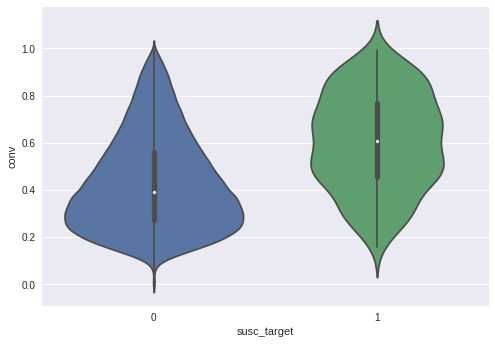

In [44]:
sns.violinplot(x=evaldf.susc_target, y=probas.conv)

**ORD**

In [0]:
orden = list(probas.sort_values("conv",ascending=False).index)
def tomar_primeros_n(ordenamiento,n,df=evaldf,label="susc_target"):
    ordenamiento = ordenamiento[:n]
    return df.iloc[ordenamiento,:][label].value_counts()

In [47]:
for i in [1000,5000,10000,50000,100000]:
    print("De un total de {} casos: ".format(i))
    print(tomar_primeros_n(orden,i,df= evaldf))
    print("\n")

De un total de 1000 casos: 
0    996
1      4
Name: susc_target, dtype: int64


De un total de 5000 casos: 
0    4971
1      29
Name: susc_target, dtype: int64


De un total de 10000 casos: 
0    9947
1      53
Name: susc_target, dtype: int64


De un total de 50000 casos: 
0    49835
1      165
Name: susc_target, dtype: int64


De un total de 100000 casos: 
0    99750
1      250
Name: susc_target, dtype: int64


